In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

import collective_weight_functions as cwf
from stockcorr import relabel_graph

In [ ]:
# Read the data
years = 18
# Load stock data csv
# Format is: stocks as columns and dates as rows
stockdf = pd.read_csv('../data/stock_market_data/stockdf.csv')

corr_, total_sum, dataframes_ = cwf.split_into_years(cor_edge_weight=True)

In [10]:
# Visualize network corr_[0]
G = nx.from_numpy_matrix(corr_[-1])
G = relabel_graph(G, dataframes_[-1].columns) # relabel nodes
# nx.draw(G, with_labels=True, )
# plt.show()

In [11]:
# Remove nodes that are not connected to any other node
G = G.subgraph(max(nx.connected_components(G), key=len))

In [23]:
# Run community detection on corr_[0]
communities_generator = community.k_clique_communities(G, k=10)
communities = list(communities_generator)

KeyboardInterrupt: 

In [22]:
# How many communities have only one node?
print(f'Number of communities with only one node: {sum([len(c) == 1 for c in communities])}')
# How many communities have more than one node?
print(f'Number of communities with more than one node: {sum([len(c) > 1 for c in communities])}')
# What is the average number of nodes in a community?
print(f'Average number of nodes in a community: {np.mean([len(c) for c in communities])}')
# What is the highest number of nodes in a community?
print(f'Highest number of nodes in a community: {np.max([len(c) for c in communities])}')
# What is the lowest number of nodes in a community?
print(f'Lowest number of nodes in a community: {np.min([len(c) for c in communities])}')

Number of communities with only one node: 0
Number of communities with more than one node: 5
Average number of nodes in a community: 119.6
Highest number of nodes in a community: 587
Lowest number of nodes in a community: 2


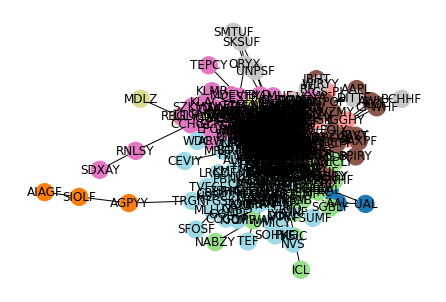

In [19]:
# Visualize the communities
# Get the colors
colors = plt.cm.tab20(np.linspace(0, 1, len(communities)))
# Create a dict with the colors
color_dict = {i: colors[i] for i in range(len(communities))}
# Create a dict with the communities
communities_dict = {i: communities[i] for i in range(len(communities))}
# Create a dict with the nodes and their communities
node_community_dict = {node: community for community, nodes in communities_dict.items() for node in nodes}
# Create a list with the colors for each node
node_colors = [color_dict[node_community_dict[node]] for node in G.nodes]
# Draw the graph
nx.draw(G, with_labels=True, node_color=node_colors)
plt.show()

In [20]:
# Print tickers for every community
for i, _community in enumerate(communities):
    print(f'Community {i}: {_community}')


Community 0: {'AAL', 'DAL', 'UAL'}
Community 1: {'SIOLF', 'AGPYY', 'AIAGF'}
Community 2: {'RSNHF', 'SSUMY', 'NABZY', 'BSAC', 'RCI', 'SSAAY', 'FQVLF', 'KFRC', 'WLMIF', 'INTK', 'RIOCF', 'NCMGY', 'BKQNY', 'MDT', 'CCK', 'FCX', 'SEBYF', 'SMMYY', 'NTDOY', 'BBBY', 'BRK-A', 'HSIC', 'ZIJMF', 'THC', 'NGLOY', 'NHYDY', 'BXP', 'NEM', 'RIO', 'CINF', 'EC', 'OLCLY', 'SGBLY', 'ICL', 'UHS', 'UCBJY', 'CIB', 'SLLDY', 'CMWAY'}
Community 3: {'VMC', 'A', 'CHDRY', 'ADSK', 'BLK', 'MTD', 'AMG', 'PH', 'F', 'ROK', 'ITW', 'GPN', 'GS-PJ', 'DKILF', 'INTU', 'MCHP', 'TOWN', 'ORKLY', 'IR', 'JCI', 'RACE', 'IGGHY', 'ECL'}
Community 4: {'AAPL', 'MAA', 'CME', 'EXPGY', 'ACDVF', 'PLD', 'XL', 'BARK', 'ESS', 'DIS', 'CYH', 'CSCO', 'EFX', 'FAST', 'NVZMY', 'MGM', 'ZTS', 'SXI', 'GOOG', 'CNO', 'UOVEY', 'RCL', 'LYV', 'CCI', 'CUK', 'HPE', 'LZAGF', 'SWKS', 'ODP', 'GMGSF', 'SKLKF', 'EW', 'AMZN', 'GJNSF', 'HXGBY', 'SHZUY', 'CPWHF', 'INFY', 'ALR', 'JBHT', 'SUGBY', 'MSFT', 'STGPF', 'IHG', 'SLF', 'GNRC', 'NSC', 'CCOHF', 'EBAY', 'CNHI', 'CM